Python 3.6.3 on Linux mint
using pyspice 1.2.0
ngspice-27

The use I am have is the the complex numbers are not being returned from AC simulation so I am not getting phase information. However if I downgrade to PySpice 1.1.0 I am not having this issue


Testing with the https://pyspice.fabrice-salvaire.fr/examples/filter/rlc-filter.html RLC exsample

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

2018-04-13 06:39:40,363 - PySpice.Spice.Netlist.__new__ - DEBUG - Element don't define a __pins__ attribute
2018-04-13 06:39:40,364 - PySpice.Spice.Netlist.__new__ - DEBUG - FixedPinElement don't define a __pins__ attribute
2018-04-13 06:39:40,365 - PySpice.Spice.Netlist.__new__ - DEBUG - SubCircuitElement don't define a __pins__ attribute
2018-04-13 06:39:40,366 - PySpice.Spice.Netlist.__new__ - DEBUG - Resistor don't define a __pins__ attribute
2018-04-13 06:39:40,366 - PySpice.Spice.Netlist.__new__ - DEBUG - SemiconductorResistor don't define a __pins__ attribute
2018-04-13 06:39:40,367 - PySpice.Spice.Netlist.__new__ - DEBUG - BehavioralResistor don't define a __pins__ attribute
2018-04-13 06:39:40,368 - PySpice.Spice.Netlist.__new__ - DEBUG - Capacitor don't define a __pins__ attribute
2018-04-13 06:39:40,368 - PySpice.Spice.Netlist.__new__ - DEBUG - SemiconductorCapacitor don't define a __pins__ attribute
2018-04-13 06:39:40,369 - PySpice.Spice.Netlist.__new__ - DEBUG - Behaviora

In [5]:
circuit1 = Circuit('Four double-pole Low-Pass RLC Filter')

Inductance = 10@u_mH
capacitance = 1@u_uF

circuit1.SinusoidalVoltageSource('Input', 'In', circuit1.gnd, amplitude=1@u_V)
# Q = .5
circuit1.R(1, 'In', 1, 200@u_Ω)
circuit1.L(1, 1, 'out5', Inductance)
circuit1.C(1, 'out5', circuit1.gnd, capacitance)
# Q = 1
circuit1.R(2, 'In', 2, 100@u_Ω)
circuit1.L(2, 2, 'out1', Inductance)
circuit1.C(2, 'out1', circuit1.gnd, capacitance)
# Q = 2
circuit1.R(3, 'In', 3, 50@u_Ω)
circuit1.L(3, 3, 'out2', Inductance)
circuit1.C(3, 'out2', circuit1.gnd, capacitance)
# Q = 4
R4 = circuit1.R(4, 'In', 4, 25@u_Ω)
circuit1.L(4, 4, 'out4', Inductance)
circuit1.C(4, 'out4', circuit1.gnd, capacitance)
print(circuit1)

.title Four double-pole Low-Pass RLC Filter
VInput In 0 DC 0V AC SIN(0V 1V 50Hz 0s 0Hz)
R1 In 1 200Ohm
L1 1 out5 10mH
C1 out5 0 1uF
R2 In 2 100Ohm
L2 2 out1 10mH
C2 out1 0 1uF
R3 In 3 50Ohm
L3 3 out2 10mH
C3 out2 0 1uF
R4 In 4 25Ohm
L4 4 out4 10mH
C4 out4 0 1uF



In [6]:
simulator1 = circuit1.simulator(temperature=25, nominal_temperature=25)
analysis1 = simulator1.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

2018-04-13 06:40:53,715 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.new_instance - INFO - New instance for id 0
2018-04-13 06:40:53,756 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._load_library - DEBUG - Load libngspice.so
2018-04-13 06:40:53,965 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.exec_command - DEBUG - Execute command: version -f
2018-04-13 06:40:53,966 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._get_version - DEBUG - Ngspice version 27 with extensions: CIDER, XSPICE
2018-04-13 06:40:53,966 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.exec_command - DEBUG - Execute command: set nomoremode
2018-04-13 06:40:53,968 - PySpice.Spice.NgSpice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - desk
.title Four double-pole Low-Pass RLC Filter
VInput In 0 DC 0V AC SIN(0V 1V 50Hz 0s 0Hz)
R1 In 1 200Ohm
L1 1 out5 10mH
C1 out5 0 1uF
R2 In 2 100Ohm
L2 2 out1 10mH
C2 out1 0 1uF
R3 In 3 50Ohm
L3 3 out2 10mH
C3 out2 0 1uF
R4 In 4 25Ohm
L4 4 out4 10mH
C4 out4 0 1uF
.options TEMP = 25

/home/iridium/anaconda3/lib/python3.6/site-packages/PySpice/Unit/Unit.py:1879: ComplexWarning: Casting complex values to real discards the imaginary part
  super(UnitValues, self).__setitem__(_slice, value)


In [7]:
resonant_frequency = 1 / (2 * math.pi * math.sqrt(inductance * capacitance))
quality_factor = 1 / R4.resistance * math.sqrt(inductance / capacitance)
print("Resonant frequency = {:.1f} Hz".format(resonant_frequency))
print("Factor of quality = {:.1f}".format(quality_factor))

Resonant frequency = 1591.5 Hz
Factor of quality = 4.0


2018-04-13 06:41:12,561 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2018-04-13 06:41:12,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'log10'> is FLOAT
2018-04-13 06:41:12,562 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2018-04-13 06:41:12,577 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2018-04-13 06:41:12,578 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'log10'> is FLOAT
2018-04-13 06:41:12,579 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2018-04-13 06:41:12,585 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2018-04-13 06:41:12,586 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'log10'> is FLOAT
2018-04-13 06:41:

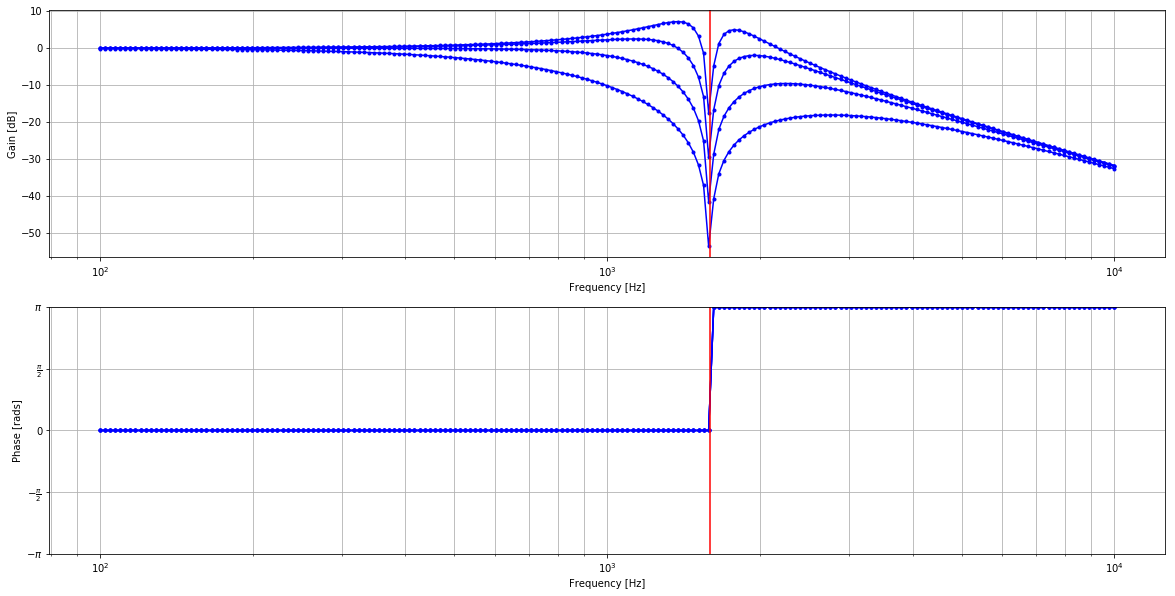

In [8]:
figure = plt.figure(1, (20, 10))
plt.title("Bode Diagrams of RLC Filters")
axes = (plt.subplot(211), plt.subplot(212))
for out in ('out5', 'out1', 'out2', 'out4'):
    bode_diagram(axes=axes,
                 frequency=analysis1.frequency,
                 gain=20*np.log10(np.absolute(analysis1[out])),
                 phase=np.angle(analysis1[out], deg=False),
                 marker='.',
                 color='blue',
                 linestyle='-',
    )
for axe in axes:
    axe.axvline(x=resonant_frequency, color='red')

2018-04-13 06:41:47,717 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword
2018-04-13 06:41:47,719 - PySpice.Spice.NgSpice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - desk
.title Pass-Band RLC Filter
Vinput in 0 DC 0V AC SIN(0V 1V 50Hz 0s 0Hz)
L1 in 2 10mH
C1 2 out 1uF
R1 out 0 25Ohm
.options TEMP = 25°C
.options TNOM = 25°C
.ic 
.ac dec 100 100Hz 10kHz
.end

2018-04-13 06:41:47,719 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.exec_command - DEBUG - Execute command: destroy all
2018-04-13 06:41:47,723 - PySpice.Spice.NgSpice.Shared.NgSpiceShared.run - DEBUG - Simulation is done
2018-04-13 06:41:47,724 - PySpice.Spice.NgSpice.Simulation.NgSpiceSharedCircuitSimulator._run - DEBUG - ['ac1', 'const']
2018-04-13 06:41:47,725 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'absolute'> is NO_CONVERSION
2018-04-13 06:41:47,725 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - INFO - Conversion for <ufunc 'log10'> 

/home/iridium/anaconda3/lib/python3.6/site-packages/PySpice/Unit/Unit.py:1879: ComplexWarning: Casting complex values to real discards the imaginary part
  super(UnitValues, self).__setitem__(_slice, value)


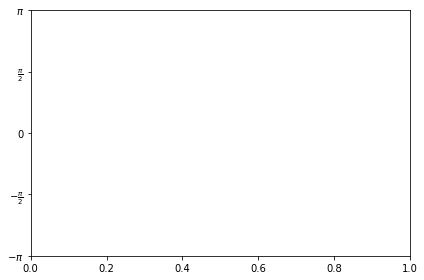

In [9]:
circuit2 = Circuit('Pass-Band RLC Filter')

circuit2.SinusoidalVoltageSource('input', 'in', circuit2.gnd, amplitude=1@u_V)
circuit2.L(1, 'in', 2, inductance)
circuit2.C(1, 2, 'out', capacitance)
circuit2.R(1, 'out', circuit2.gnd, 25@u_Ω)

simulator2 = circuit2.simulator(temperature=25, nominal_temperature=25)
analysis2 = simulator2.ac(start_frequency=100@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

bode_diagram(axes=axes,
             frequency=analysis2.frequency,
             gain=20*np.log10(np.absolute(analysis2.out)),
             phase=np.angle(analysis2.out, deg=False),
             marker='.',
             color='magenta',
             linestyle='-',
            )

plt.tight_layout()
plt.show()